#Naive Bayes Classification

---



##Import Libraries


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Load the Dataset

In [83]:
df = pd.read_csv('heart.csv')

# Split the data into features (X) and target (y)

In [84]:
X = df.drop('target', axis=1)
y = df['target']

#Train-Test Split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling (Optional for Decision Tree, but we include it for consistency)


In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Naive Bayes model


In [95]:
nb = GaussianNB()

# Train the model and make Predication

In [96]:
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)


#EDA

# 1. Initial Data Exploration


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Create DataFrames for better visualization
df_train = pd.DataFrame(X_train, columns=[
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
])
df_test = pd.DataFrame(X_test, columns=df_train.columns)

print("Initial Data Overview")
print(df_train.describe())
print(df_train.info())
print(df_train.head())

Initial Data Overview
              age         sex          cp    trestbps        chol         fbs  \
count  820.000000  820.000000  820.000000  820.000000  820.000000  820.000000   
mean    54.367073    0.700000    0.952439  131.724390  245.051220    0.146341   
std      9.166917    0.458537    1.039598   17.618454   49.668373    0.353664   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  820.000000  820.000000  820.000000  820.000000  820.000000  820.000000   
mean     0.519512  149.351220    0.345122    1.040244    1.389024    0.751220   
std  

# 2. Feature Distribution Analysis Before Scaling


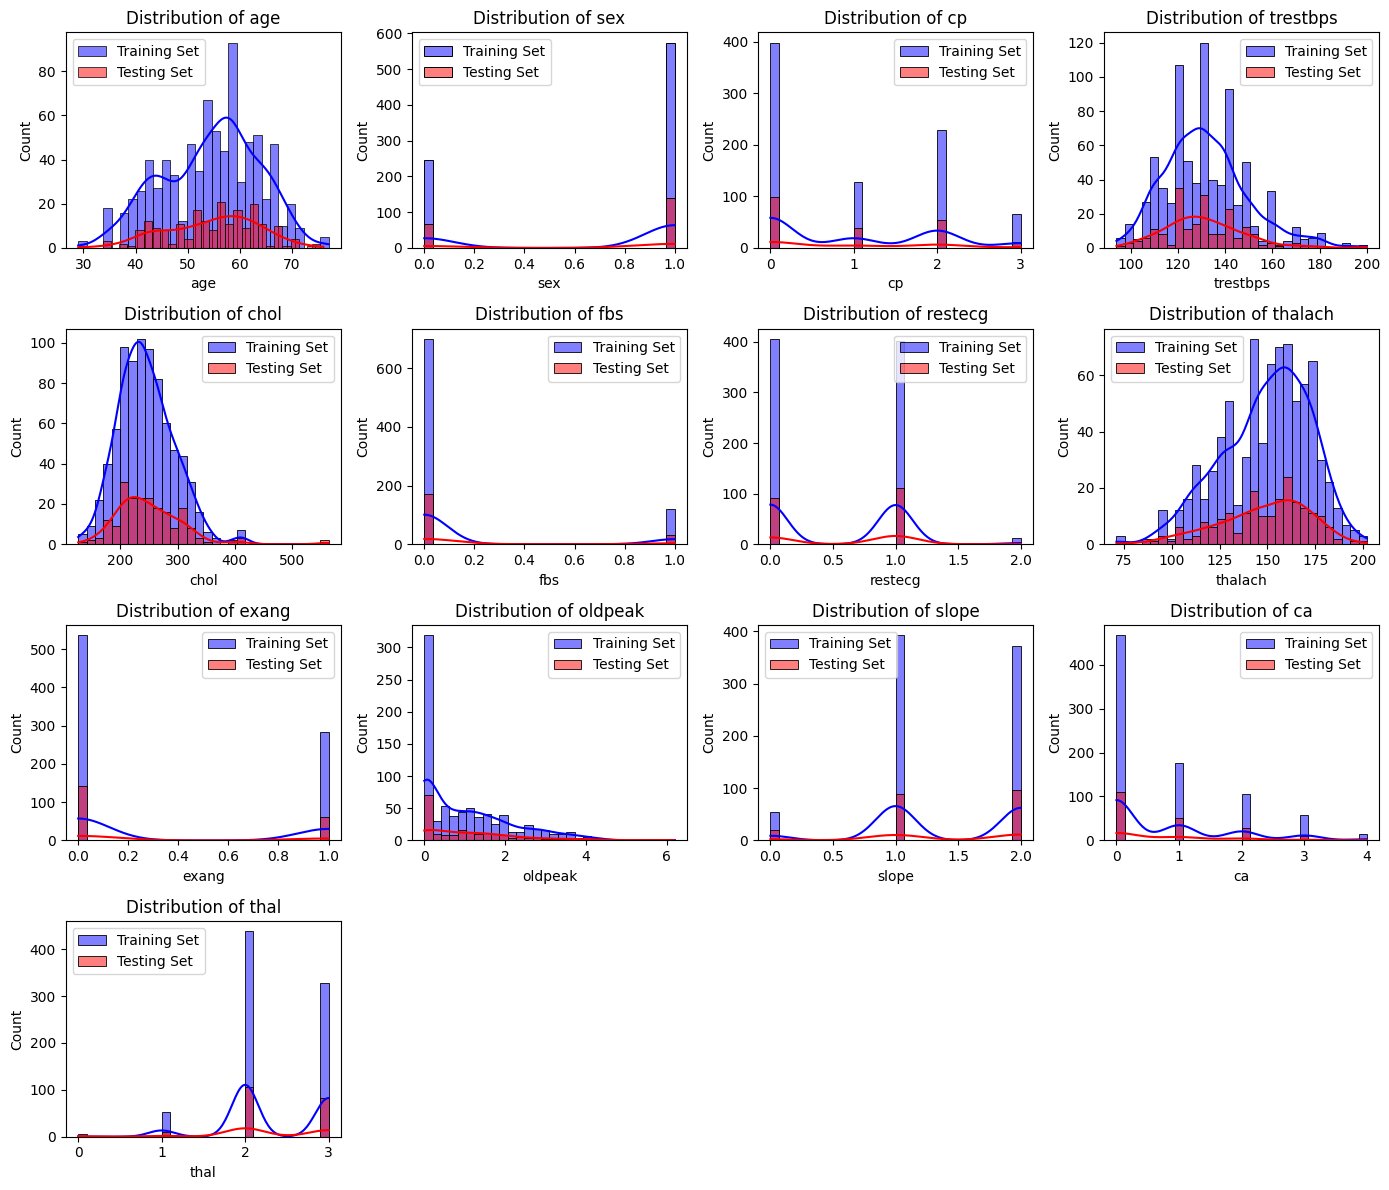

In [98]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(df_train.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_train[col], kde=True, bins=30, color='blue', label='Training Set')
    sns.histplot(df_test[col], kde=True, bins=30, color='red', label='Testing Set')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.tight_layout()
plt.show()

# 3. Apply Feature Scaling


In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create DataFrames for scaled data


In [100]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=df_train.columns)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=df_train.columns)



# Plot feature distributions after scaling


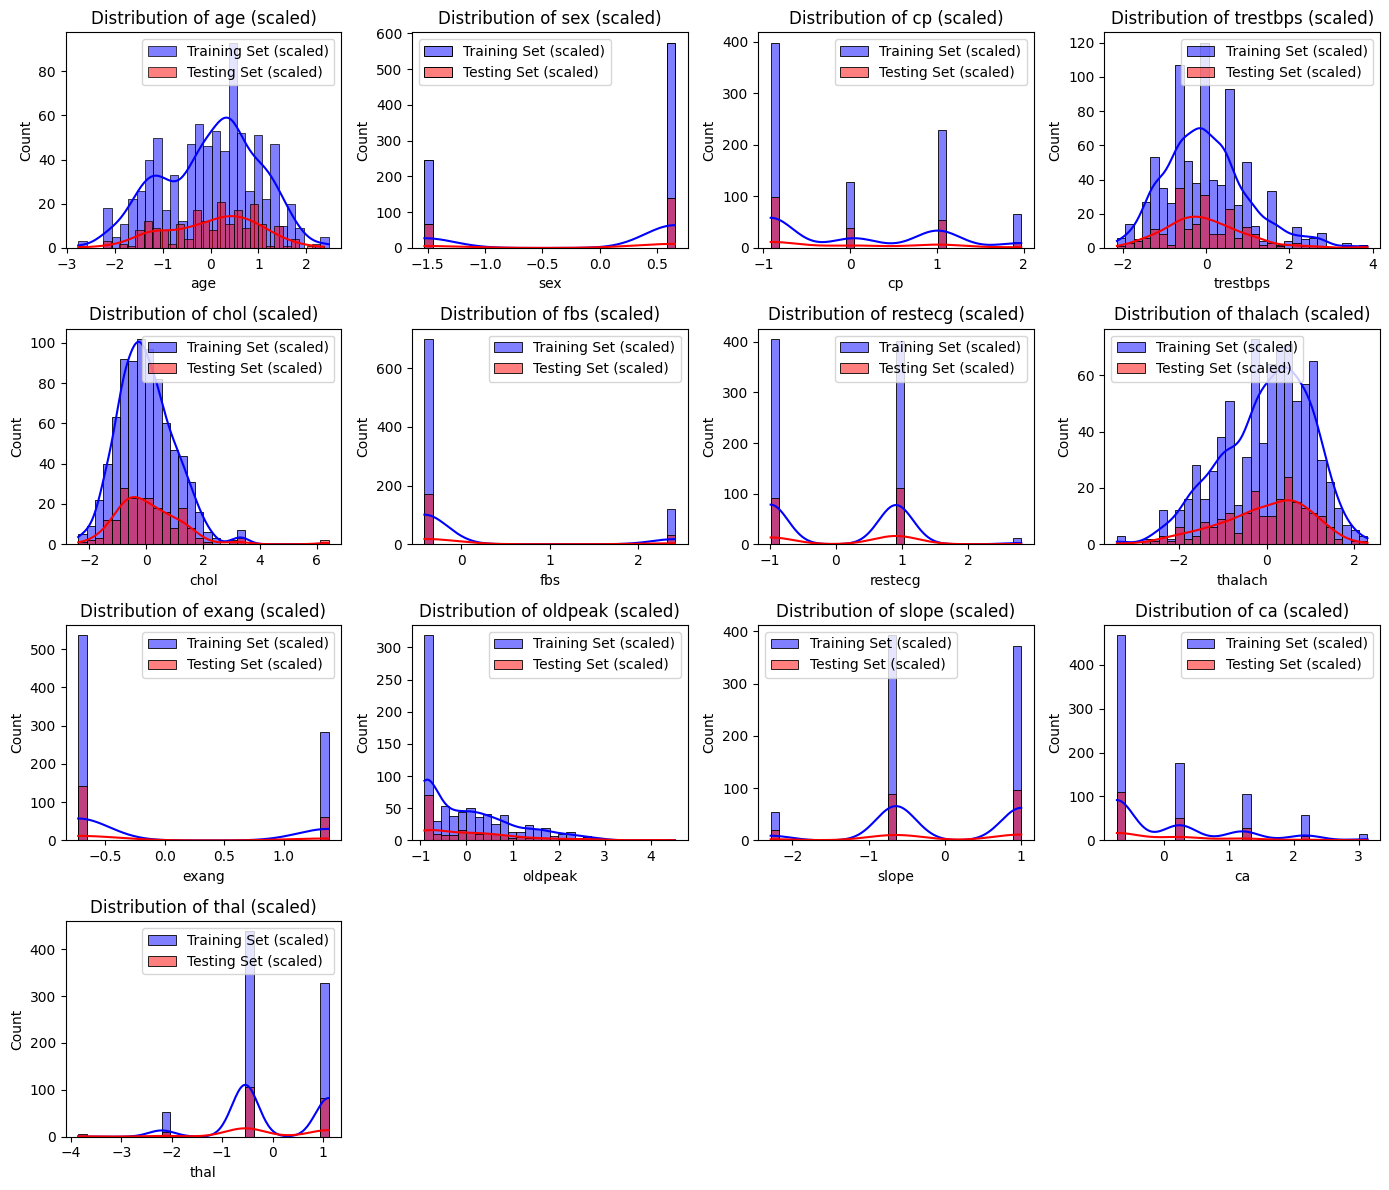

In [101]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(df_train_scaled.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_train_scaled[col], kde=True, bins=30, color='blue', label='Training Set (scaled)')
    sns.histplot(df_test_scaled[col], kde=True, bins=30, color='red', label='Testing Set (scaled)')
    plt.title(f'Distribution of {col} (scaled)')
    plt.legend()
    plt.tight_layout()
plt.show()

# 4. Model Training and Evaluation



In [102]:
y_pred_nb = nb.predict(X_test_scaled)  # Generate predictions

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

# Print the evaluation results
print("Model Performance")
print(f'Accuracy: {accuracy_nb:.2f}')
print('Confusion Matrix:\n', conf_matrix_nb)
print('Classification Report:\n', class_report_nb)



Model Performance
Accuracy: 0.80
Confusion Matrix:
 [[72 30]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# Visualizing Model Performance


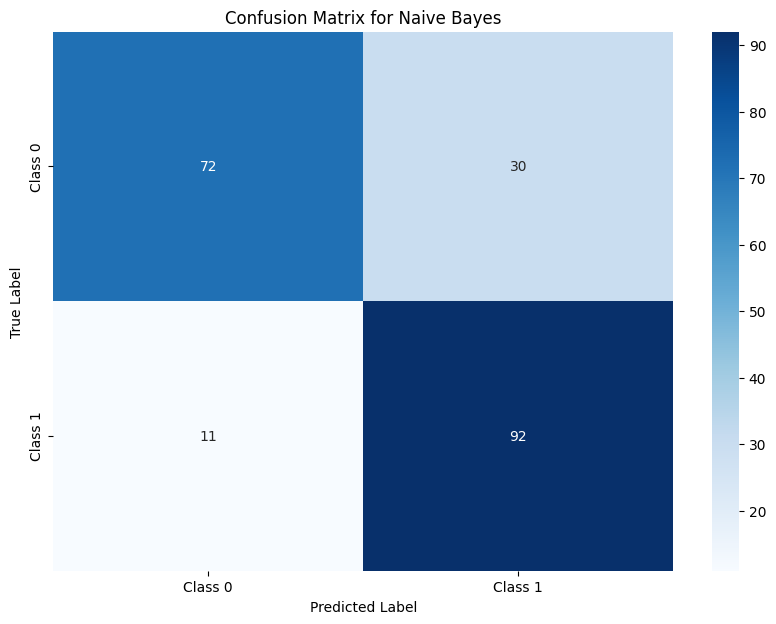

In [103]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importances (Naive Bayes does not have feature importances directly, but you can visualize feature means)


<Figure size 1400x1000 with 0 Axes>

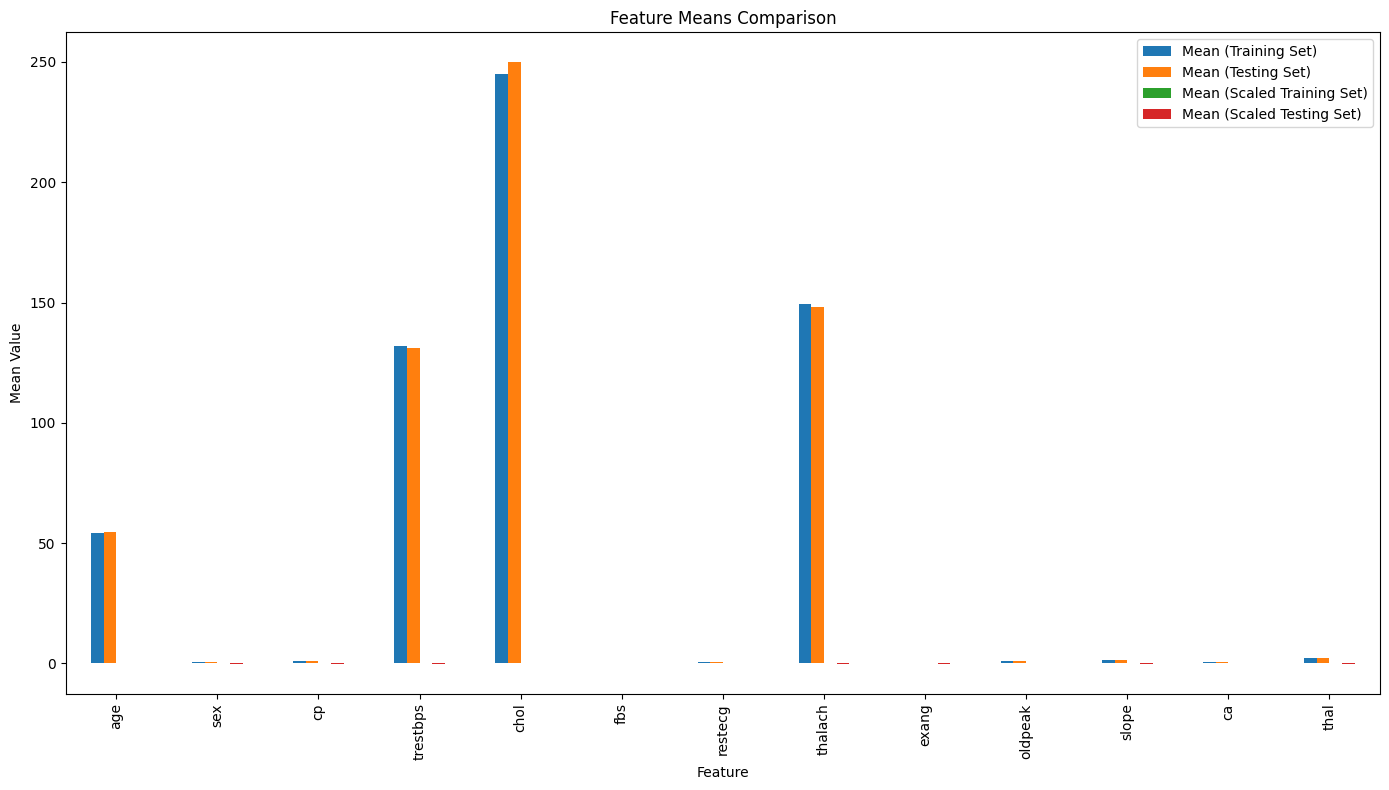

In [110]:


# Verify the feature lengths
num_features = X_train.shape[1]  # Get number of features directly from X_train

# Ensure that all arrays have the same length
assert len(X_train.mean(axis=0)) == num_features, "Mismatch in number of features for X_train"
assert len(X_test.mean(axis=0)) == num_features, "Mismatch in number of features for X_test"
assert len(X_train_scaled.mean(axis=0)) == num_features, "Mismatch in number of features for X_train_scaled"
assert len(X_test_scaled.mean(axis=0)) == num_features, "Mismatch in number of features for X_test_scaled"

# Create the DataFrame
# Get feature names directly from X_train if it has column names
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature {i}" for i in range(num_features)]  # Use generic names if no column names

feature_means = pd.DataFrame({
    'Feature': feature_names,
    'Mean (Training Set)': X_train.mean(axis=0),
    'Mean (Testing Set)': X_test.mean(axis=0),
    'Mean (Scaled Training Set)': X_train_scaled.mean(axis=0),
    'Mean (Scaled Testing Set)': X_test_scaled.mean(axis=0)
})

# Plot feature means comparison
plt.figure(figsize=(14, 10))
feature_means.set_index('Feature').plot(kind='bar', figsize=(14, 8))
plt.title('Feature Means Comparison')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Explanation of Additional Visualizations**   
Feature Distribution Analysis Before Scaling:

**Histograms with KDE:** Visualize the distributions of each feature in both the training and testing sets before scaling. This helps identify any potential distribution differences between the two datasets.
Feature Distribution Analysis After Scaling:

**Histograms with KDE**: Visualize the distributions of each feature after scaling for both the training and testing sets. This helps ensure that scaling was applied consistently and observe the standardized feature distributions.
Confusion Matrix:

**Heatmap of Confusion Matrix:** Displays the confusion matrix for the Naive Bayes model's predictions. This helps visualize the number of true positives, true negatives, false positives, and false negatives.
Feature Means Comparison:

**Bar Plot of Feature Means**: Shows the means of features in the training and testing sets before and after scaling. This helps compare the central tendencies of features and ensures that scaling had the intended effect.
These visualizations provide additional insights into the data and the performance of the Naive Bayes model, helping you understand both the features and the model's predictions.